<a href="https://colab.research.google.com/github/GouthamSiripuramunt/Legal_Annotation/blob/GouthamSiripuramunt-developer/Copy_of_LegalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install transformers

In [13]:
import pandas as pd, glob, re, string,seaborn as sns
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score,precision_recall_fscore_support,log_loss
from sklearn.linear_model import Lasso, SGDClassifier,LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import keras.backend as K
import tensorflow as tf
from keras import layers, losses
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping,TensorBoard
from sklearn.model_selection import train_test_split,GridSearchCV, LeaveOneOut, KFold,cross_val_score
#import tensorflow_text as text
import tensorflow_hub as hub
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from numpy import mean
from matplotlib import pyplot
from tqdm import tqdm
import os
#os.system('CUDA_LAUNCH_BLOCKING=1')
from sklearn.utils import resample
import math, numpy as np
import glob
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
import lightgbm as lgb
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import transformers
#from transformers import AutoModel, BertTokenizerFast
import torch
# specify GPU
device = torch.device("cuda")
'''import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification ,BertTokenizer, AutoModel, AutoTokenizer
from transformers import Trainer, TrainingArguments'''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'import torch\nfrom transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available\nfrom transformers import BertTokenizerFast, BertForSequenceClassification ,BertTokenizer, AutoModel, AutoTokenizer\nfrom transformers import Trainer, TrainingArguments'

**Create DataFrames**

In [6]:
def clean_text(text,stop_words=True, normalization=True):
    cleaned_text = text.lower()
    cleaned_text = "".join(c for c in cleaned_text if c not in string.punctuation)
    cleaned_text = "".join(c for c in cleaned_text if ord(c)<128)
    words = cleaned_text.split()
    if normalization == True:
      if stop_words==True:
          words = [w for w in words if w not in stopwords.words("english")]
      lem = WordNetLemmatizer()
      words = [lem.lemmatize(word, "v") for word in words]
      words = [lem.lemmatize(word, "n") for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text
def create_dataframe(path):
    train_files = glob.glob(path + "/*.csv")
    df = pd.concat([pd.read_csv(filename, index_col=None, header=0) for filename in train_files], axis=0, ignore_index=True)
    df = df.drop(['Unnamed: 0'],axis=1)
    df = df.drop_duplicates()
    return df

In [7]:
path = r'/content/drive/My Drive/LegalArguementMining/'
df_train = create_dataframe(path + "Train_data")
df_train,df_untouched = train_test_split(df_train, stratify=df_train['Target'], test_size=0.2)
df_test = create_dataframe(path + "test_data")
df_unlabelled = create_dataframe(path + "Unlabeled_data")
df_train.head()

,Sentence,Target
2632,"In Ex Parte Coleman, 245 S.W. 2d 712, it was h...",Invalid
2071,As these provisions have been construed by the...,Rule/Law/Holding
6701,"The case was called for trial on August 29, 1961.",Facts
1919,The court or jury trying the case is not confi...,Rule/Law/Holding
6613,â€œGENTLEMENS OF THE JURY:,Others


In [6]:
df_train.shape,df_test.shape,df_train1.shape,df_untouched.shape,df_unlabelled.shape

((4435, 2), (521, 2), (3548, 2), (887, 2), (502560, 2))

In [ ]:
df_train['Target'].unique()

array(['Facts', 'Rule/Law/Holding', 'Conclusion', 'Issue', 'Invalid',
       'Analysis', 'Others'], dtype=object)

In [ ]:
df_test['Target'].unique()

array(['Facts', 'Analysis', 'Rule/Law/Holding', 'Conclusion', 'Invalid',
       'Issue', 'Others'], dtype=object)

In [ ]:
df_untouched.shape,df_train.shape,df_test.shape,df_unlabelled.shape

((887, 2), (3548, 2), (521, 2), (502560, 2))

Analysis on length of all the sentences in the train set

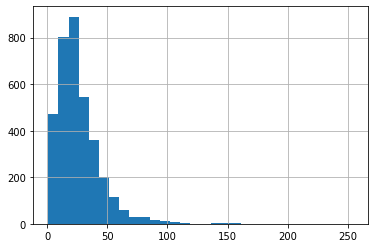

In [ ]:
pd.Series([len(i.split()) for i in df_train['Sentence']]).hist(bins = 30)

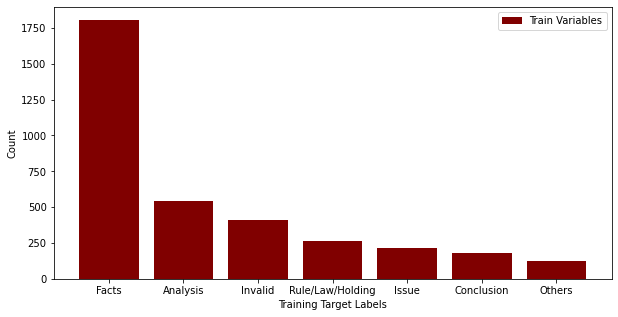

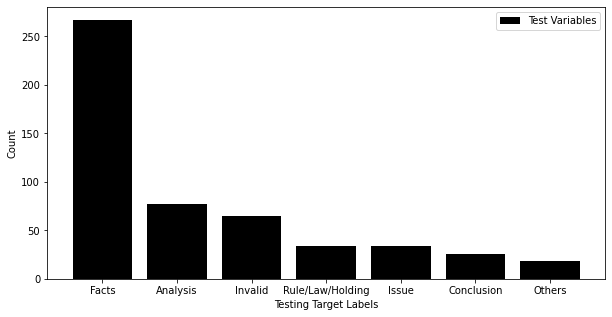

In [ ]:
#plot bar graphs of df_train and df_test
import matplotlib.pyplot as plt  
# creating the dataset 
data = df_train['Target'].value_counts()
keys = list(data.keys()) 
values = list(data.values) 
data1 = df_test['Target'].value_counts()
keys1 = list(data1.keys()) 
values1 = list(data1.values)    
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot 
plt.bar(keys, values, color ='maroon',label ='Train Variables')  
plt.xlabel("Training Target Labels") 
plt.ylabel("Count") 
plt.legend()
plt.show()
plt.figure(figsize = (10, 5)) 
plt.bar(keys1, values1, color ='black',label ='Test Variables')
plt.xticks(keys)    
plt.xlabel("Testing Target Labels") 
plt.ylabel("Count") 
plt.legend()
plt.show()

**Label Encoding Dependent Variable**

In [ ]:
l = LabelEncoder().fit(df_train['Target'])
df_train['Target'] = l.transform(df_train['Target'])
df_untouched['Target'] = l.transform(df_untouched['Target'])
df_test['Target'] = l.transform(df_test['Target'])
df_train.head()

,Sentence,Target
3449,"Thereupon, a person identified as â€œRoyâ€ ca...",2
16481,h. performs an obscene act or otherwise presen...,6
23361,Many of the cases cited relate to searches inc...,2
2617,"Defendant Guam Memorial Hospital, (GMH), filed...",2
6624,"342, 58 S.W. 2d 1099, are to be construed as c...",1


**Clean Text and no Normalization**

In [ ]:
df_train['Sentence'] = df_train['Sentence'].apply(clean_text, normalization=False)
df_untouched['Sentence'] = df_untouched['Sentence'].apply(clean_text, normalization=False)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text, normalization=False)

**Cleaned and Normalized Text**

In [ ]:
df_train['Normalized_Sentence'] = df_train['Sentence'].apply(clean_text)
df_untouched['Normalized_Sentence'] = df_untouched['Sentence'].apply(clean_text)
df_test['Normalized_Sentence'] = df_test['Sentence'].apply(clean_text)

1. Word Embedding with Tf-Idf
2. Word Embedding with Word2Vec
3. Word Embedding with BERT

**Word Embedding with Tf-Idf**

In [ ]:
def data2tfidf(data1,data2,data3,pca=False):
  data = pd.concat([data1,data2,data3],axis=0)
  t= TfidfVectorizer().fit(data['Normalized_Sentence'])
  x = t.transform(data['Normalized_Sentence']).toarray()
  train_x, test_x, untouched_x = t.transform(data1['Normalized_Sentence']).toarray(), t.transform(data2['Normalized_Sentence']).toarray(), t.transform(data3['Normalized_Sentence']).toarray()
  train_y, test_y, untouched_y = data1['Target'], data2['Target'], data3['Target']
  if pca:
    pcas = PCA(500).fit(x)
    train_x, test_x, untouched_x = pcas.transform(train_x), pcas.transform(test_x), pcas.transform(untouched_x)
  return train_x,train_y,test_x,test_y, untouched_x, untouched_y

train_x,train_y,test_x,test_y, untouched_x, untouched_y = data2tfidf(df_train,df_test,df_untouched,pca=False)
train_x.shape,train_y.shape,test_x.shape,test_y.shape,untouched_x.shape, untouched_y.shape

((3548, 5973), (3548,), (521, 5973), (521,), (887, 5973), (887,))

1. Logistic Regression
2. Decision Trees
3. Random Forests
4. Gradient Boosting
5. XGBoosting
6. Light Boosting
7. Ada Boosting
8. Ridge Classification

In [ ]:
def get_models(a=0,b=None):
    models = [RandomForestClassifier(),XGBClassifier(),LGBMClassifier()]
    train_accuracy,untouched_accuracy,test_accuracy = [], [], []
    if not b:
      b=len(models)
    l = models[a:b]
    for m in tqdm(l):
        m.fit(train_x, train_y)
        train_accuracy.append(accuracy_score(train_y,m.predict(train_x)))
        untouched_accuracy.append(accuracy_score(untouched_y,m.predict(untouched_x)))
        test_accuracy.append(accuracy_score(test_y,m.predict(test_x)))
    data = pd.DataFrame({'Model':[str(i)[:-2] for i in l],'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,'Untouched Accuracy':untouched_accuracy})
    return data
get_models()

100%|██████████| 3/3 [03:21<00:00, 67.24s/it]


,Model,Training Accuracy,Testing Accuracy,Untouched Accuracy
0,RandomForestClassifier,0.991826,0.600768,0.559188
1,XGBClassifier(objective='multi:softprob,0.850056,0.633397,0.612176
2,LGBMClassifier,0.991826,0.627639,0.609921


In [ ]:
def get_models(a=0,b=None):
    models = [RandomForestClassifier(),XGBClassifier(),LGBMClassifier()]
    train_accuracy,untouched_accuracy,test_accuracy = [], [], []
    if not b:
      b=len(models)
    l = models[a:b]
    for m in tqdm(l):
        m.fit(train_x, train_y)
        train_accuracy.append(accuracy_score(train_y,m.predict(train_x)))
        untouched_accuracy.append(accuracy_score(untouched_y,m.predict(untouched_x)))
        test_accuracy.append(accuracy_score(test_y,m.predict(test_x)))
    data = pd.DataFrame({'Model':[str(i)[:-2] for i in l],'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,'Untouched Accuracy':untouched_accuracy})
    return data
get_models()

100%|██████████| 3/3 [05:15<00:00, 105.25s/it]


,Model,Training Accuracy,Testing Accuracy,Untouched Accuracy
0,RandomForestClassifier,0.992390,0.631478,0.608794
1,XGBClassifier(objective='multi:softprob,0.669673,0.589251,0.593010
2,LGBMClassifier,0.881060,0.654511,0.618940


In [ ]:
parameter_grid = {'learning_rate' : [ 0.0001,0.001,0.01,0.1,1,10]}
lgbm= LGBMClassifier(n_estimators = 1000)
cv = KFold(n_splits=10, shuffle=True, random_state=101)
gridsearch = GridSearchCV(estimator=lgbm, param_grid=parameter_grid, scoring='accuracy', cv=cv)
gridsearch.fit(train_x,train_y)
m = gridsearch.best_estimator_
print(m)
m.fit(train_x,train_y)
print('Training Accuracy is',accuracy_score(train_y,m.predict(train_x)))
print('Untouched Accuracy is',accuracy_score(untouched_y,m.predict(untouched_x)))
print('Testing Accuracy is',accuracy_score(test_y,m.predict(test_x)))

LGBMClassifier(learning_rate=0.01, n_estimators=1000)
Training Accuracy is 0.87880496054115
Untouched Accuracy is 0.6133032694475761
Testing Accuracy is 0.6238003838771593


Co-Training

In [28]:
#Co-training Algorithm
from sklearn.utils import resample
import math, numpy as np
import glob

def create_dataframe(path):
        train_files = glob.glob(path + "/*.csv")
        df = pd.concat([pd.read_csv(filename, index_col=None, header=0) for filename in train_files], axis=0, ignore_index=True)
        df = df.drop(['Unnamed: 0'],axis=1)
        return df
        
train = create_dataframe('/content/drive/My Drive/LegalArguementMining/' + "Train_data")
train.sort_values("Sentence", inplace = True)
train = train.drop_duplicates(subset ="Sentence")
train['Target'].unique()
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()
print(len(train))
train = train.rename(columns={'Sentence':'text'})
test = pd.read_csv(r'/content/drive/My Drive/LegalArguementMining/test_data/test_data.csv')
unlabelled = pd.read_csv(r'/content/drive/My Drive/LegalArguementMining/Unlabeled_data/Unlabeled_data.csv')
class CoTraining():
  def perform(self,train,test,unlabelled):
    self.wl= WordNetLemmatizer()
    test['Target']=test['Target'].replace(['Others'],'Invalid')
    test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
    words = stopwords.words('english')
    test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
    self.test = test
    def training(unlabel_1,train,i,j):
        test = self.test
        target_values = np.unique(train['Target'].values)
        data_list = []
        data_length_list = []
        for i in target_values:
          df_k = train[train['Target']==i]
          data_list.append(df_k)
          data_length_list.append(len(df_k))
        maximum_data = max(data_length_list)
        ratio = math.floor(( 4 / 6 )* maximum_data)
        loop_count = 0
        train_upsampled = []
        for i in data_length_list:
          if i < ratio:
            df_upsampled = resample(data_list[loop_count],replace=True,n_samples=ratio,random_state=123)
          else:
            df_upsampled = resample(data_list[loop_count],replace=True,n_samples=i,random_state=123)
          train_upsampled.append(df_upsampled)
          loop_count = loop_count + 1
        df_res = pd.concat(train_upsampled)
        train = df_res.copy(deep = True)
        i_list.append(i)
        j_list.append(j)
        #cleaning
        
        stopword=nltk.corpus.stopwords.words('english')
        def clean_text(text):
          text="".join([word.lower() for word in text if word not in string.punctuation])
          tokens = re.split('\W+',text)
          text = [self.wl.lemmatize(word) for word in tokens if word not in stopword]
          return text
        tfidf_vect = TfidfVectorizer(analyzer = clean_text)
        X_tfidf = tfidf_vect.fit_transform(train['text'])
        #Read the test data
        t_p = tfidf_vect.transform(test['Sentence'])
        classifier_rf = RandomForestClassifier(n_estimators = 350, criterion = 'gini', max_features = 'auto', random_state = 42)
        classifier_lgb = lgb.LGBMClassifier()
        classifier_svm = svm.LinearSVC(multi_class='ovr',class_weight='balanced')
        X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.20,random_state=42)
        X_train_whole = X_tfidf
        Y_train_whole = train['Target']
        classifier_rf.fit(X_train, Y_train)
        classifier_lgb.fit(X_train, Y_train)
        classifier_svm.fit(X_train, Y_train)
        val_pred_rf = classifier_rf.predict(x_val)
        val_pred_lgb = classifier_lgb.predict(x_val)
        val_pred_svm = classifier_svm.predict(x_val)
        Accuracy_score_rf = accuracy_score(y_val,val_pred_rf)
        Accuracy_score_lgb = accuracy_score(y_val,val_pred_lgb)
        Accuracy_score_svm = accuracy_score(y_val,val_pred_svm)
        if (Accuracy_score_rf > Accuracy_score_lgb) and (Accuracy_score_rf > Accuracy_score_svm):
          B = classifier_rf
        elif (Accuracy_score_svm > Accuracy_score_lgb) and (Accuracy_score_svm > Accuracy_score_rf):
          B = classifier_svm
        else:
          B = classifier_lgb
        B.fit(X_train_whole,Y_train_whole)
        test_pred = B.predict(t_p)
        accuracy_test = accuracy_score(test['Target'],test_pred)
        class_x_un1 = tfidf_vect.transform(unlabel_1['text'])

        pred_unlabel_1 = B.predict_proba(class_x_un1)
        Threshold = 0.9
        pos, large, ind=[], [], []
        i=0
        for j in pred_unlabel_1:
          if max(j)> Threshold:
            ind.append(np.argmax(j))
            large.append(max(j))
            pos.append(i)
          i+=1
        unlabel_1 = unlabel_1.iloc[pos,:]
        class_x_un1 = tfidf_vect.transform(unlabel_1['text'])
        class_pred_unlabel_1 = B.predict(class_x_un1)
        unlabel_1['Target']=class_pred_unlabel_1
        frame_1 = [train,unlabel_1]
        train_1 = pd.concat(frame_1)   
        return train_1,accuracy_test
    #Read the unlabeled data
    unlabel = unlabelled
    del unlabel['Unnamed: 0']
    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
    words = stopwords.words('english')
    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
    unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
    all_Data_train_size = len(train)
    length_list = range(500,len(unlabel),500)
    length_list = [100,200,300,400,500]
    j=0
    i_list = []
    j_list = []
    for i in tqdm(length_list):
      unlabel_chunk = unlabel[j:i]
      train,accuracy_test = training(unlabel_chunk,train,i,j)
      j=i
      print("length of Unlabel",len(unlabel_chunk))
      print('Length of Training + Unlabel', len(train))
      print(accuracy_test)
    return accuracy_test
CoTraining().perform(train,test,unlabelled)

4416


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: FutureWarning: The default value of regex will change from True to False in a future version.
  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 20%|██        | 1/5 [01:05<04:22, 65.51s/it]

length of Unlabel 100
Length of Training + Unlabel 9765
0.6353166986564299


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 40%|████      | 2/5 [02:02<03:01, 60.39s/it]

length of Unlabel 100
Length of Training + Unlabel 9769
0.6353166986564299


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 60%|██████    | 3/5 [03:22<02:19, 69.54s/it]

length of Unlabel 100
Length of Training + Unlabel 9774
0.6142034548944337


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 80%|████████  | 4/5 [04:45<01:14, 74.66s/it]

length of Unlabel 100
Length of Training + Unlabel 9779
0.6084452975047985


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 5/5 [05:36<00:00, 67.33s/it]

length of Unlabel 100
Length of Training + Unlabel 9783
0.5950095969289827


0.5950095969289827

Psuedo Labeling

In [ ]:
import glob, numpy as np
from textblob import TextBlob
from textblob import Word
def create_dataframe(path):
    train_files = glob.glob(path + "/*.csv")
    df = pd.concat([pd.read_csv(filename, index_col=None, header=0) for filename in train_files], axis=0, ignore_index=True)
    df = df.drop(['Unnamed: 0'],axis=1)
    return df
train = create_dataframe('/content/drive/My Drive/LegalArguementMining/' + "Train_data")

train.sort_values("Sentence", inplace = True)


train = train.drop_duplicates(subset ="Sentence")

train['Target'].unique()

train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()
test = pd.read_csv(r'/content/drive/My Drive/LegalArguementMining/test_data/test_data.csv')
unlabelled = pd.read_csv(r'/content/drive/My Drive/LegalArguementMining/Unlabeled_data/Unlabeled_data.csv')
class PseudoLabelling():
  def perform(self,train,test,unlabelled):
    wl= WordNetLemmatizer()
    #cleaning data
    def clean_text(text):
      text="".join([word.lower() for word in text if word not in string.punctuation])
      tokens = re.split('\W+',text)
      text = [wl.lemmatize(word) for word in tokens if word not in stopword]
      return text

    tfidf_vect = TfidfVectorizer(analyzer = clean_text)
    X_tfidf = tfidf_vect.fit_transform(train['Sentence'])

    #reading the test data
    test = test
    X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.20,random_state=42)
    #Initialize the classifier
    classifier = LGBMClassifier()
    classifier.fit(X_train, Y_train)
    #Unlabel data preprocessing
    unlabel = unlabelled
    #unlabel.head()

    del unlabel['Complete']
    del unlabel['Unnamed: 0']

    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
    words = stopwords.words('english')
    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))

    
    nltk.download('wordnet')
    nltk.download('punkt')
    unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

    def index_reset(unlabel_2):
      unlabel_2.reset_index(inplace=True)
      del unlabel_2['index']
      return unlabel_2
    unlabel_size_list = [500,1000]
    #unlabel_size = 500 #comment
    Threshold = 0.9 # comment
    train = train.rename(columns={'Sentence':'text'})
    record_unlabel_size_list = []
    record_concat_train_size_list = []
    record_upsample_size = []
    record_cross_f1 = [] 
    record_cross_accuracy = []
    record_SS_CR = []
    record_SS_F1 = []
    accuracy = []
    thresholds = [0.9,0.91,0.92]
    #looping through the unlabel data
    for threshold in thresholds:
      for unlabel_size in unlabel_size_list:
        record_unlabel_size_list.append(unlabel_size)
        unlabel_1 = unlabel.loc[:unlabel_size]
        unlabel_1 = index_reset(unlabel_1)
        tfidf_vect = TfidfVectorizer(analyzer = clean_text)
        X_tfidf = tfidf_vect.fit_transform(train['text'])
        x_un1 = tfidf_vect.transform(unlabel_1['text'])
        print(x_un1.shape)
        pred_unlabel_1 = classifier.predict_proba(x_un1)
        pred_unlabel_1
        x_un1.shape
        pos=[]
        large=[]
        ind = []
        i=0
        for j in pred_unlabel_1:
          if max(j)> threshold:
            ind.append(np.argmax(j))
            large.append(max(j))
            pos.append(i)
          i+=1
        unlabel_1 = unlabel_1.iloc[pos,:]
        train_data_size = len(unlabel_1)
        class_x_un1 = tfidf_vect.transform(unlabel_1['text'])
        class_x_un1.shape
        class_pred_unlabel_1 = classifier.predict(class_x_un1)
        class_pred_unlabel_1
        unlabel_1['Target']=class_pred_unlabel_1
        train = train.rename(columns={'Sentence':'text'})
        frame_1 = [train,unlabel_1]
        train_1 = pd.concat(frame_1)
        record_concat_train_size_list.append(len(train_1))
        target_values = np.unique(train_1['Target'].values)
        data_list = []
        data_length_list = []
        for i in target_values:
          df_k = train_1[train_1['Target']==i]
          data_list.append(df_k)
          data_length_list.append(len(df_k))
        maximum_data = max(data_length_list)
        ratio = math.floor(( 4 / 6 )* maximum_data)
        loop_count = 0
        train_upsampled = []
        for i in data_length_list:
          if i < ratio:
            df_upsampled = resample(data_list[loop_count],replace=True,n_samples=ratio,random_state=123)
          else:
            df_upsampled = resample(data_list[loop_count],replace=True,n_samples=i,random_state=123)
          train_upsampled.append(df_upsampled)
          loop_count = loop_count + 1
        df_res = pd.concat(train_upsampled)
        record_upsample_size.append(len(df_res))
        tfidf_vect = TfidfVectorizer(analyzer = clean_text)
        X_tfidf = tfidf_vect.fit_transform(df_res['text'])
        X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
        X_tfidf_df.columns=tfidf_vect.get_feature_names()
        X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,df_res['Target'],test_size=0.20,random_state=42)
        classifier_1 = LGBMClassifier()
        classifier_1.fit(X_train, Y_train)
        y_pred = classifier_1.predict(x_val)
        Accuracy_score = accuracy_score(y_val, y_pred)
        cv = KFold(n_splits=5, random_state=1, shuffle=True)
        scores_acc = cross_val_score(classifier_1,x_val ,y_val, scoring = 'accuracy', cv=cv, n_jobs=-1).mean()
        record_cross_accuracy.append(scores_acc)
        test['Target']=test['Target'].replace(['Others'],'Invalid')
        test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
        test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
        words = stopwords.words('english')
        test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
        t_p = tfidf_vect.transform(test['Sentence'])
        test_pred = classifier_1.predict(t_p)
        classification_report_semi_supervised = classification_report(test['Target'],test_pred, digits=4)
        record_SS_CR.append(classification_report_semi_supervised)
        f1_Score_metric = f1_score(test['Target'],test_pred,average='weighted')
        record_SS_F1.append(f1_Score_metric)
        accuracy.append(accuracy_score(test['Target'],test_pred))
        print(f'For {threshold}: Datapoints {unlabel_size}',accuracy_score(test['Target'],test_pred))
    return accuracy
PseudoLabelling().perform(train,test,unlabelled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning: The default value of regex will change from True to False in a future version.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


EM-

In [ ]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification ,BertTokenizer
from transformers import Trainer, TrainingArguments
import numpy as np
import random
import keras.backend as K
import tensorflow as tf
import transformers
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping,TensorBoard
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import pandas as pd, glob, re, string,seaborn as sns
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [31]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import f1_score
import math
from sklearn.utils import resample
drive.mount('/content/drive')

#Read the labeled data
'''train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train = train1
train_list = [train2,train3,train4,train5,train6,train7,train8,train9,train10,train_highKappa]
for i in train_list:
  train = train.append(i)'''

import glob
def create_dataframe(path):
    train_files = glob.glob(path + "/*.csv")
    df = pd.concat([pd.read_csv(filename, index_col=None, header=0) for filename in train_files], axis=0, ignore_index=True)
    df = df.drop(['Unnamed: 0'],axis=1)
    return df
train = create_dataframe('/content/drive/My Drive/LegalArguementMining/' + "Train_data")

train.sort_values("Sentence", inplace = True)
new_train = train.drop_duplicates(subset ="Sentence")
train = new_train
#train['Target'].unique()
train['Target']=train['Target'].replace(['Others'],'Invalid')
#train['Target'].unique()
test = pd.read_csv(r'/content/drive/My Drive/LegalArguementMining/test_data/test_data.csv')
unlabelled = pd.read_csv(r'/content/drive/My Drive/LegalArguementMining/Unlabeled_data/Unlabeled_data.csv')

#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()
class EMLightGBM():
  def perform(self,train,test,unlabelled):
    def clean_text(text):
      text="".join([word.lower() for word in text if word not in string.punctuation])
      tokens = re.split('\W+',text)
      text = [wl.lemmatize(word) for word in tokens if word not in stopword]
      return text
    #len(train['Sentence'])
    text = clean_text(train['Sentence'])
    tfidf_vect = TfidfVectorizer(analyzer = clean_text)
    X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
    print(X_tfidf.shape)
    #Read the test data
    test = test
    test['Target']=test['Target'].replace(['Others'],'Invalid')
    test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
    from nltk.corpus import stopwords
    words = stopwords.words('english')
    test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
    t_p = tfidf_vect.transform(test['Sentence'])
    #Read the unlabeled data
    unlabel = unlabelled
    del unlabel['Complete']
    del unlabel['Unnamed: 0']

    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
    from nltk.corpus import stopwords
    words = stopwords.words('english')
    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))

    from textblob import TextBlob
    from textblob import Word
    nltk.download('wordnet')
    nltk.download('punkt')
    unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
    unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

    def index_reset(unlabel_2):
      unlabel_2.reset_index(inplace=True)
      del unlabel_2['index']
      return unlabel_2
    def feature_set_selection(train_and_unlabel_words_wo_duplicates,train_words,unlabel_words):
      for term in train_and_unlabel_words_wo_duplicates:
        freq_train = train_words.count(term) / len(train_words)
        freq_unlabel = unlabel_words.count(term) / len(unlabel_words)
        if freq_unlabel == 0:
          PF.append(term)
        elif (freq_train // freq_unlabel) > Threshold_feature:
          PF.append(term)
        else:
          NF.append(term)

    #Identifying  a  set  of  reliable  negative  documents from the unlabeled set
    def RN_selection(RN, unlabel_1):
      iteration_RN = 0
      RN_to_be_removed = []
      pos_to_be_removed = []
      freq_each_word_list = []
      Q_pos = []
      count = 0
      if_count = 0
      for doc in unlabel_1['text']:
        doc_words = clean_text(doc)
        doc_words_wo_duplicates = list(set(doc_words))
        for_count = 0
        
        for each_doc_word in doc_words_wo_duplicates:
          for_count = for_count + 1
          freq_each_doc_word = doc_words.count(each_doc_word)
          freq_each_word_list.append(freq_each_doc_word)
          if (freq_each_doc_word > 0) and (each_doc_word in PF):
            if_count = if_count + 1
            pos_to_be_removed.append(count)
            RN_to_be_removed.append(doc)
            break
          
        if for_count == len(doc_words_wo_duplicates):
          Q_pos.append(count)
        count = count + 1
        iteration_RN = iteration_RN + 1
      RN.drop(pos_to_be_removed,axis=0,inplace=True)
      return RN,pos_to_be_removed, Q_pos, if_count

    max_length = 512
    model_name = "bert-base-uncased"
    #tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)
    #model = BertForSequenceClassification.from_pretrained(model_name, num_labels=8)
    def classifier_select_bert(train, Q, RN):
          f1_score_list = []
          per_CR_list = []
          loop_variable =0
          while(1):
            p_and_RN = pd.concat([train,RN])
            p_and_RN.reset_index(inplace=True,drop=True)
            p_and_RN_vect = tfidf_vect.transform(p_and_RN['text'])
            p_and_RN_vect_df=pd.DataFrame(p_and_RN_vect.toarray())

            #Q_vect = tfidf_vect.transform(Q['text'])
            #Q_vect_df=pd.DataFrame(Q_vect.toarray())

            #lgb_classifier = lgb.LGBMClassifier()
            max_length = 512
            g=[]
            for i in p_and_RN['Target']:
              if i==-1:
                g.append(int(7))
              else:
                g.append(i)
            p_and_RN['Target']=g
            target_names = p_and_RN['Target'].value_counts().keys().tolist()
            print(target_names)
            
            
            
            train_encodings = tokenizer(p_and_RN['text'].to_list(), truncation=True, padding=True, max_length=max_length)
            #valid_encodings = tokenizer(valid_texts.to_list(), truncation=True, padding=True, max_length=max_length)
            def get_prediction(text):
                inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
                outputs = model(**inputs)
                probs = outputs[0].softmax(1)
                return probs.argmax().cpu().numpy()
            class NewsGroupsDataset(torch.utils.data.Dataset):
                def __init__(self, encodings, labels):
                    self.encodings = encodings
                    self.labels = labels

                def __getitem__(self, idx):
                    item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
                    item["labels"] = torch.tensor([self.labels[idx]])
                    return item

                def __len__(self):
                    return len(self.labels)

            # convert our tokenized data into a torch Dataset
            train_dataset = NewsGroupsDataset(train_encodings, p_and_RN['Target'].to_list())
            #valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels.to_list())
            
            from sklearn.metrics import accuracy_score

            def compute_metrics(pred):
              labels = pred.label_ids
              preds = pred.predictions.argmax(-1)
              acc = accuracy_score(labels, preds)
              return {'accuracy': acc}
            training_args = TrainingArguments(
                output_dir='./results',          # output directory
                num_train_epochs=3,              # total number of training epochs
                per_device_train_batch_size=8,    # batch size for evaluation
                warmup_steps=500,                # number of warmup steps for learning rate scheduler
                weight_decay=0.01,               # strength of weight decay
                logging_dir='./logs',            # directory for storing logs
                load_best_model_at_end=True,    # load the best model when finished training (default metric is loss)
                # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
                logging_steps=400,               # log & save weights each logging_steps
                save_steps=400,
                evaluation_strategy="steps",     # evaluate each `logging_steps`
            )
            trainer = Trainer(
                model=model,                         # the instantiated Transformers model to be trained
                args=training_args,                  # training arguments, defined above
                train_dataset=train_dataset,          # evaluation dataset
                compute_metrics=compute_metrics,     # the callback that computes metrics of interest
            )
            # train the model
            trainer.train()
            #lgb_classifier.fit(p_and_RN_vect_df, p_and_RN['Target'])
            #np.unique(p_and_RN['Target'])

            #checking the classifier if it gives best results
            #train_vect = tfidf_vect.transform(train['text'])
            #train_vect_df=pd.DataFrame(train_vect.toarray())
            #train_pred = lgb_classifier.predict(train_vect_df)
            train_pred = [get_prediction(i) for i in train['text']]
            classified_negative = (train_pred.tolist()).count(7)
            percentage = (classified_negative / len(train_pred)) * 100
            model_list.append(lgb_classifier)
            if percentage < percent_thresh:
              thresh_model_list.append(model)
              test_pred = [get_prediction(i) for i in test['Sentence']]
              #test_pred = lgb_classifier.predict(t_p.toarray())
              test['Target']= LabelEncoder().fit_transform(test['Target'])
              classification_report_test = classification_report(test['Target'],test_pred,digits=4)
              f1_score_test = f1_score(test['Target'],test_pred,average='weighted')
              f1_score_list.append(f1_score_test)
              per_CR_list.append(classification_report_test)
            #Q_pred = lgb_classifier.predict(Q_vect_df)
            Q_pred = [get_prediction(i) for i in Q['text']]
            np.unique(Q_pred)
            count_q = 0
            total_q = 0 
            out_pos_q = []
            pos_q = []
            for i in Q_pred:
              if i == 7:
                pos_q.append(count_q)
                total_q = total_q + 1
              else:
                out_pos_q.append(count_q)
              count_q = count_q + 1
            Q.reset_index(inplace=True,drop=True)
            W = Q.loc[pos_q,:]
            if W.empty :
              #print("W is empty, came out of loop")
              break
            else:
              Q_new = Q.loc[out_pos_q,:]
              Q = Q_new.copy(deep =True)
              RN = pd.concat([RN,W])
              RN.reset_index(inplace=True,drop=True)
              loop_variable = loop_variable + 1
            #print("completed iteration")
          result_dict['F1_score'].append(f1_score_list)
          result_dict['CR'].append(per_CR_list)
          return lgb_classifier, model_list , thresh_model_list, p_and_RN
    def classifier_select(train, Q, RN):
      f1_score_list = []
      per_CR_list = []
      loop_variable =0
      while(1):
        p_and_RN = pd.concat([train,RN])
        p_and_RN.reset_index(inplace=True,drop=True)
        p_and_RN_vect = tfidf_vect.transform(p_and_RN['text'])
        p_and_RN_vect_df=pd.DataFrame(p_and_RN_vect.toarray())

        Q_vect = tfidf_vect.transform(Q['text'])
        Q_vect_df=pd.DataFrame(Q_vect.toarray())

        lgb_classifier = lgb.LGBMClassifier()
        lgb_classifier.fit(p_and_RN_vect_df, p_and_RN['Target'])
        np.unique(p_and_RN['Target'])

        #checking the classifier if it gives best results
        train_vect = tfidf_vect.transform(train['text'])
        train_vect_df=pd.DataFrame(train_vect.toarray())
        train_pred = lgb_classifier.predict(train_vect_df)
        classified_negative = (train_pred.tolist()).count(-1)
        percentage = (classified_negative / len(train_pred)) * 100
        model_list.append(lgb_classifier)
        if percentage < percent_thresh:
          thresh_model_list.append(lgb_classifier)
          test_pred = lgb_classifier.predict(t_p.toarray())
          test['Target']= LabelEncoder().fit_transform(test['Target'])
          classification_report_test = classification_report(test['Target'],test_pred,digits=4)
          f1_score_test = f1_score(test['Target'],test_pred,average='weighted')
          f1_score_list.append(f1_score_test)
          per_CR_list.append(classification_report_test)
        Q_pred = lgb_classifier.predict(Q_vect_df)
        np.unique(Q_pred)
        count_q = 0
        total_q = 0 
        out_pos_q = []
        pos_q = []
        for i in Q_pred:
          if i == -1:
            pos_q.append(count_q)
            total_q = total_q + 1
          else:
            out_pos_q.append(count_q)
          count_q = count_q + 1
        Q.reset_index(inplace=True,drop=True)
        W = Q.loc[pos_q,:]
        if W.empty :
          #print("W is empty, came out of loop")
          break
        else:
          Q_new = Q.loc[out_pos_q,:]
          Q = Q_new.copy(deep =True)
          RN = pd.concat([RN,W])
          RN.reset_index(inplace=True,drop=True)
          loop_variable = loop_variable + 1
        #print("completed iteration")
      result_dict['F1_score'].append(f1_score_list)
      result_dict['CR'].append(per_CR_list)
      return lgb_classifier, model_list , thresh_model_list, p_and_RN
    model_list = []
    thresh_model_list = []
    UL_size_list = []
    result_dict = {"F1_score":[],"CR":[],"Unlabel_size":[]}
    Threshold_feature = 1
    percent_thresh = 5
    unlabel_range = [700,750,800]

    for size in unlabel_range:
      unlabel_1 = unlabel.loc[:size]
      unlabel_1 = index_reset(unlabel_1)
      unlabel_1_copy = unlabel_1.copy(deep = True)
      x_un1 = tfidf_vect.transform(unlabel_1['text'])
      PF = []
      NF = []
      unlabel_1['Target']=-1
      train = train.rename(columns={'Sentence':'text'})
      train['Target']= LabelEncoder().fit_transform(train['Target'])
      train_and_unlabel =  pd.concat([train,unlabel_1])
      #print(len(train))
      #print(len(unlabel_1))
      #print(len(train_and_unlabel))

      train = train.rename(columns={'Sentence':'text'})
      #mixed sampling
      train_and_unlabel =  pd.concat([train,unlabel_1])
      #print("len of train_and_unlabel",len(train_and_unlabel))
      train_and_unlabel.reset_index(inplace=True)
      del train_and_unlabel['index']
      target_values = np.unique(train_and_unlabel['Target'].values)
      data_list = []
      data_length_list = []
      for i in target_values:
        df_k = train_and_unlabel[train_and_unlabel['Target']==i]
        data_list.append(df_k)
        data_length_list.append(len(df_k))
      maximum_data = max(data_length_list)
      ratio = math.floor(( 4 / 6 )* maximum_data)
      loop_count = 0
      train_upsampled = []
      for i in data_length_list:
        if i < ratio:
          df_upsampled = resample(data_list[loop_count],replace=True,n_samples=ratio,random_state=123)
        else:
          df_upsampled = resample(data_list[loop_count],replace=True,n_samples=i,random_state=123)
        train_upsampled.append(df_upsampled)
        loop_count = loop_count + 1

      df_res = pd.concat(train_upsampled)
      train_and_unlabel = df_res.copy(deep = True)
      #print("len of train_and_unlabel",len(train_and_unlabel))
      train['Target']= LabelEncoder().fit_transform(train['Target'])
      train_and_unlabel_words = clean_text(train_and_unlabel['text'])
      train_and_unlabel_words_wo_duplicates = list(set(train_and_unlabel_words))
      train_words = clean_text(train['text'])
      train_words_wo_duplicates = list(set(train_words))
      unlabel_words = clean_text(unlabel_1['text'])
      unlabel_words_wo_duplicates = list(set(unlabel_words))
      feature_set_selection(train_and_unlabel_words_wo_duplicates,train_words,unlabel_words)
      RN = unlabel_1.copy(deep=True) 
      RN,op_pos_to_be_removed, op_Q_pos, op_if_count = RN_selection(RN,unlabel_1) 
      Q =  unlabel_1.loc[op_pos_to_be_removed,:]
      result_dict['Unlabel_size'].append(size) 
      lgb_classifier, op_model_list, op_thresh_model_list, p_and_RN = classifier_select(train, Q, RN)
    for model in op_model_list:
      test_pred = model.predict(t_p.toarray())
      test['Target']= LabelEncoder().fit_transform(test['Target'])
      classification_report_test = classification_report(test['Target'],test_pred,digits=4)
      print(accuracy_score(test['Target'],test_pred))
    for model in op_thresh_model_list:
      test_pred = model.predict(t_p.toarray())
      test['Target']= LabelEncoder().fit_transform(test['Target'])
      classification_report_test = classification_report(test['Target'],test_pred,digits=4)
      print(accuracy_score(test['Target'],test_pred))
    return accuracy_score(test['Target'],test_pred)

EMLightGBM().perform(train,test,unlabelled)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
(4416, 7374)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: FutureWarning: The default value of regex will change from True to False in a future version.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:350: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/s

0.6468330134357005
0.6410748560460653
0.6391554702495201


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6314779270633397
0.6295585412667947
0.6410748560460653
0.6372360844529751


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6372360844529751
0.6276391554702495
0.6161228406909789
0.6276391554702495


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6276391554702495
0.6276391554702495
0.6238003838771593
0.6314779270633397


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6314779270633397
0.6333973128598849
0.6238003838771593


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6142034548944337
0.6257197696737045
0.6295585412667947
0.6468330134357005


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6410748560460653
0.6391554702495201
0.6314779270633397
0.6295585412667947


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6410748560460653
0.6372360844529751
0.6372360844529751
0.6276391554702495


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6161228406909789
0.6276391554702495
0.6276391554702495
0.6276391554702495


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6238003838771593
0.6314779270633397
0.6314779270633397
0.6333973128598849


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

0.6238003838771593
0.6142034548944337
0.6257197696737045
0.6295585412667947


0.6295585412667947

BERT + Fine - Tuning

In [4]:
import random, numpy as np
import glob
def create_dataframe(path):
    train_files = glob.glob(path + "/*.csv")
    df = pd.concat([pd.read_csv(filename, index_col=None, header=0) for filename in train_files], axis=0, ignore_index=True)
    df = df.drop(['Unnamed: 0'],axis=1)
    df = df.drop_duplicates()
    return df
path = r'/content/drive/My Drive/LegalArguementMining/'
df_train = create_dataframe(path + "Train_data")
df_train,df_untouched = train_test_split(df_train, stratify=df_train['Target'], test_size=0.2)
df_test = create_dataframe(path + "test_data")
df_unlabelled = create_dataframe(path + "Unlabeled_data")
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder().fit(df_train['Target'])
df_train['Target'] = l.transform(df_train['Target'])
df_untouched['Target'] = l.transform(df_untouched['Target'])
df_test['Target'] = l.transform(df_test['Target'])

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf
        tf.random.set_seed(seed)
set_seed(1)
max_length = 512
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", do_lower_case=True)
train_texts , train_labels = df_train['Sentence'], df_train['Target']
valid_texts, valid_labels = df_test['Sentence'], df_test['Target']
test_texts, test_labels = df_untouched['Sentence'], df_untouched['Target']
target_names = df_train['Target'].value_counts().keys().tolist()

train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts.to_list(), truncation=True, padding=True, max_length=max_length)
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels.to_list())
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels.to_list())
model_name = '/content/drive/My Drive/LegalArguementMining/bert1'
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names)).to("cuda")
from sklearn.metrics import accuracy_score
def get_prediction(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    return target_names[probs.argmax()], probs.argmax().cpu().numpy()

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
model1 = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(target_names)).to("cuda")
def get_prediction(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    return target_names[probs.argmax()], probs.argmax().cpu().numpy()
pred = [get_prediction(i)[1] for i in df_test.Sentence.values.tolist()]
print('Accuracy of Test Dataset :',accuracy_score(pred, df_test.Target.values.tolist()))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Accuracy of Test Dataset : 0.7543186180422264


GAN-Bert

In [1]:
import random, numpy as np
!pip install transformers==4.3.2
import torch
import io
import torch.nn.functional as F
import random
import numpy as np
import time
import math
import datetime
import torch.nn as nn
from transformers import *
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
if torch.cuda.is_available():
  torch.cuda.manual_seed_all(seed_val)
# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
#--------------------------------
#  Transformer parameters
#--------------------------------
max_seq_length = 64
batch_size = 64

#--------------------------------
#  GAN-BERT specific parameters
#--------------------------------
# number of hidden layers in the generator, 
# each of the size of the output space
num_hidden_layers_g = 1; 
# number of hidden layers in the discriminator, 
# each of the size of the input space
num_hidden_layers_d = 1; 
# size of the generator's input noisy vectors
noise_size = 100
# dropout to be applied to discriminator's input vectors
out_dropout_rate = 0.2

# Replicate labeled data to balance poorly represented datasets, 
# e.g., less than 1% of labeled material
apply_balance = True

#--------------------------------
#  Optimization parameters
#--------------------------------
learning_rate_discriminator = 5e-5
learning_rate_generator = 5e-5
epsilon = 1e-8
num_train_epochs = 10
multi_gpu = True
# Scheduler
apply_scheduler = False
warmup_proportion = 0.1
# Print
print_each_n_step = 10

#--------------------------------
#  Adopted Tranformer model
#--------------------------------
# Since this version is compatible with Huggingface transformers, you can uncomment
# (or add) transformer models compatible with GAN

model_name = "bert-base-cased"
#model_name = "bert-base-uncased"
#model_name = "roberta-base"
#model_name = "albert-base-v2"
#model_name = "xlm-roberta-base"
#model_name = "amazon/bort"

#--------------------------------
#  Retrieve the TREC QC Dataset
#--------------------------------
! git clone https://github.com/crux82/ganbert

transformer = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

     |████████████████████████████████| 1.8 MB 29.7 MB/s 
     |████████████████████████████████| 895 kB 19.4 MB/s 
     |████████████████████████████████| 3.3 MB 11.4 MB/s 
There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Cloning into 'ganbert'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 77 (delta 32), reused 25 (delta 25), pack-reused 40
Unpacking objects: 100% (77/77), done.


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [10]:
#  NOTE: in this setting 50 classes are involved
df_unlabelled['Target'] = ['UNK_UNK' for i in range(len(df_unlabelled['Complete']))]
df_unlabelled['Sentence'] = [i for i in df_unlabelled['text']]
labeled_file = df_train
unlabeled_file = df_unlabelled[:39744]
test_filename = df_test

label_list = df_train['Target'].value_counts().keys().to_list()
label_list.append('UNK_UNK' )

In [11]:
def get_qc_examples(df):
  """Creates examples for the training and dev sets."""
  examples = [(text_a, label) for text_a, label in zip(df['Sentence'],df['Target'])]
  return examples
#Load the examples
labeled_examples = get_qc_examples(df_train)
unlabeled_examples = get_qc_examples(df_unlabelled)
test_examples = get_qc_examples(df_test)
def generate_data_loader(input_examples, label_masks, label_map, do_shuffle = False, balance_label_examples = False):
  '''
  Generate a Dataloader given the input examples, eventually masked if they are 
  to be considered NOT labeled.
  '''
  examples = []

  # Count the percentage of labeled examples  
  num_labeled_examples = 0
  for label_mask in label_masks:
    if label_mask: 
      num_labeled_examples += 1
  label_mask_rate = num_labeled_examples/len(input_examples)

  # if required it applies the balance
  for index, ex in enumerate(input_examples): 
    if label_mask_rate == 1 or not balance_label_examples:
      examples.append((ex, label_masks[index]))
    else:
      # IT SIMULATE A LABELED EXAMPLE
      if label_masks[index]:
        balance = int(1/label_mask_rate)
        balance = int(math.log(balance,2))
        if balance < 1:
          balance = 1
        for b in range(0, int(balance)):
          examples.append((ex, label_masks[index]))
      else:
        examples.append((ex, label_masks[index]))
  
  #-----------------------------------------------
  # Generate input examples to the Transformer
  #-----------------------------------------------
  input_ids = []
  input_mask_array = []
  label_mask_array = []
  label_id_array = []

  # Tokenization 
  for (text, label_mask) in examples:
    encoded_sent = tokenizer.encode(text[0], add_special_tokens=True, max_length=max_seq_length, padding="max_length", truncation=True)
    input_ids.append(encoded_sent)
    label_id_array.append(label_map[text[1]])
    label_mask_array.append(label_mask)
  
  # Attention to token (to ignore padded input wordpieces)
  for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]                          
    input_mask_array.append(att_mask)
  # Convertion to Tensor
  input_ids = torch.tensor(input_ids) 
  input_mask_array = torch.tensor(input_mask_array)
  label_id_array = torch.tensor(label_id_array, dtype=torch.long)
  label_mask_array = torch.tensor(label_mask_array)

  # Building the TensorDataset
  dataset = TensorDataset(input_ids, input_mask_array, label_id_array, label_mask_array)

  if do_shuffle:
    sampler = RandomSampler
  else:
    sampler = SequentialSampler

  # Building the DataLoader
  return DataLoader(
              dataset,  # The training samples.
              sampler = sampler(dataset), 
              batch_size = batch_size) # Trains with this batch size.

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))
label_map = {}
for (i, label) in enumerate(label_list):
  label_map[label] = i
#------------------------------
#   Load the train dataset
#------------------------------
train_examples = labeled_examples
#The labeled (train) dataset is assigned with a mask set to True
train_label_masks = np.ones(len(labeled_examples), dtype=bool)
#If unlabel examples are available
if unlabeled_examples:
  train_examples = train_examples + unlabeled_examples
  #The unlabeled (train) dataset is assigned with a mask set to False
  tmp_masks = np.zeros(len(unlabeled_examples), dtype=bool)
  train_label_masks = np.concatenate([train_label_masks,tmp_masks])

train_dataloader = generate_data_loader(train_examples, train_label_masks, label_map, do_shuffle = True, balance_label_examples = apply_balance)

#------------------------------
#   Load the test dataset
#------------------------------
#The labeled (test) dataset is assigned with a mask set to True
test_label_masks = np.ones(len(test_examples), dtype=bool)

test_dataloader = generate_data_loader(test_examples, test_label_masks, label_map, do_shuffle = False, balance_label_examples = False)
#------------------------------
#   The Generator as in 
#   https://www.aclweb.org/anthology/2020.acl-main.191/
#   https://github.com/crux82/ganbert
#------------------------------
class Generator(nn.Module):
    def __init__(self, noise_size=100, output_size=512, hidden_sizes=[512], dropout_rate=0.1):
        super(Generator, self).__init__()
        layers = []
        hidden_sizes = [noise_size] + hidden_sizes
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])

        layers.append(nn.Linear(hidden_sizes[-1],output_size))
        self.layers = nn.Sequential(*layers)

    def forward(self, noise):
        output_rep = self.layers(noise)
        return output_rep

#------------------------------
#   The Discriminator
#   https://www.aclweb.org/anthology/2020.acl-main.191/
#   https://github.com/crux82/ganbert
#------------------------------
class Discriminator(nn.Module):
    def __init__(self, input_size=512, hidden_sizes=[512], num_labels=7, dropout_rate=0.1):
        super(Discriminator, self).__init__()
        self.input_dropout = nn.Dropout(p=dropout_rate)
        layers = []

        hidden_sizes = [input_size] + hidden_sizes
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])

        self.layers = nn.Sequential(*layers) #per il flatten
        self.logit = nn.Linear(hidden_sizes[-1],num_labels+1) # +1 for the probability of this sample being fake/real.
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, input_rep):
        input_rep = self.input_dropout(input_rep)
        last_rep = self.layers(input_rep)
        logits = self.logit(last_rep)
        probs = self.softmax(logits)
        return last_rep, logits, probs
# The config file is required to get the dimension of the vector produced by 
# the underlying transformer
config = AutoConfig.from_pretrained(model_name)
hidden_size = int(config.hidden_size)
# Define the number and width of hidden layers
hidden_levels_g = [hidden_size for i in range(0, num_hidden_layers_g)]
hidden_levels_d = [hidden_size for i in range(0, num_hidden_layers_d)]

#-------------------------------------------------
#   Instantiate the Generator and Discriminator
#-------------------------------------------------
generator = Generator(noise_size=noise_size, output_size=hidden_size, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate)
discriminator = Discriminator(input_size=hidden_size, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate)

# Put everything in the GPU if available
if torch.cuda.is_available():    
  generator.cuda()
  discriminator.cuda()
  transformer.cuda()
  if multi_gpu:
    transformer = torch.nn.DataParallel(transformer)

# print(config)
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

#models parameters
transformer_vars = [i for i in transformer.parameters()]
d_vars = transformer_vars + [v for v in discriminator.parameters()]
g_vars = [v for v in generator.parameters()]

#optimizer
dis_optimizer = torch.optim.AdamW(d_vars, lr=learning_rate_discriminator)
gen_optimizer = torch.optim.AdamW(g_vars, lr=learning_rate_generator) 

#scheduler
if apply_scheduler:
  num_train_examples = len(train_examples)
  num_train_steps = int(num_train_examples / batch_size * num_train_epochs)
  num_warmup_steps = int(num_train_steps * warmup_proportion)

  scheduler_d = get_constant_schedule_with_warmup(dis_optimizer, 
                                           num_warmup_steps = num_warmup_steps)
  scheduler_g = get_constant_schedule_with_warmup(gen_optimizer, 
                                           num_warmup_steps = num_warmup_steps)

# For each epoch...
for epoch_i in range(0, num_train_epochs):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, num_train_epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    tr_g_loss = 0
    tr_d_loss = 0

    # Put the model into training mode.
    transformer.train() 
    generator.train()
    discriminator.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every print_each_n_step batches.
        if step % print_each_n_step == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        b_label_mask = batch[3].to(device)

        real_batch_size = b_input_ids.shape[0]
     
        # Encode real data in the Transformer
        model_outputs = transformer(b_input_ids, attention_mask=b_input_mask)
        hidden_states = model_outputs[-1]
        
        # Generate fake data that should have the same distribution of the ones
        # encoded by the transformer. 
        # First noisy input are used in input to the Generator
        noise = torch.zeros(real_batch_size, noise_size, device=device).uniform_(0, 1)
        # Gnerate Fake data
        gen_rep = generator(noise)

        # Generate the output of the Discriminator for real and fake data.
        # First, we put together the output of the tranformer and the generator
        disciminator_input = torch.cat([hidden_states, gen_rep], dim=0)
        # Then, we select the output of the disciminator
        features, logits, probs = discriminator(disciminator_input)

        # Finally, we separate the discriminator's output for the real and fake
        # data
        features_list = torch.split(features, real_batch_size)
        D_real_features = features_list[0]
        D_fake_features = features_list[1]
      
        logits_list = torch.split(logits, real_batch_size)
        D_real_logits = logits_list[0]
        D_fake_logits = logits_list[1]
        
        probs_list = torch.split(probs, real_batch_size)
        D_real_probs = probs_list[0]
        D_fake_probs = probs_list[1]

        #---------------------------------
        #  LOSS evaluation
        #---------------------------------
        # Generator's LOSS estimation
        g_loss_d = -1 * torch.mean(torch.log(1 - D_fake_probs[:,-1] + epsilon))
        g_feat_reg = torch.mean(torch.pow(torch.mean(D_real_features, dim=0) - torch.mean(D_fake_features, dim=0), 2))
        g_loss = g_loss_d + g_feat_reg
  
        # Disciminator's LOSS estimation
        logits = D_real_logits[:,0:-1]
        log_probs = F.log_softmax(logits, dim=-1)
        # The discriminator provides an output for labeled and unlabeled real data
        # so the loss evaluated for unlabeled data is ignored (masked)
        label2one_hot = torch.nn.functional.one_hot(b_labels, len(label_list))
        per_example_loss = -torch.sum(label2one_hot * log_probs, dim=-1)
        per_example_loss = torch.masked_select(per_example_loss, b_label_mask.to(device))
        labeled_example_count = per_example_loss.type(torch.float32).numel()

        # It may be the case that a batch does not contain labeled examples, 
        # so the "supervised loss" in this case is not evaluated
        if labeled_example_count == 0:
          D_L_Supervised = 0
        else:
          D_L_Supervised = torch.div(torch.sum(per_example_loss.to(device)), labeled_example_count)
                 
        D_L_unsupervised1U = -1 * torch.mean(torch.log(1 - D_real_probs[:, -1] + epsilon))
        D_L_unsupervised2U = -1 * torch.mean(torch.log(D_fake_probs[:, -1] + epsilon))
        d_loss = D_L_Supervised + D_L_unsupervised1U + D_L_unsupervised2U

        #---------------------------------
        #  OPTIMIZATION
        #---------------------------------
        # Avoid gradient accumulation
        gen_optimizer.zero_grad()
        dis_optimizer.zero_grad()

        # Calculate weigth updates
        # retain_graph=True is required since the underlying graph will be deleted after backward
        g_loss.backward(retain_graph=True)
        d_loss.backward() 
        
        # Apply modifications
        gen_optimizer.step()
        dis_optimizer.step()

        # A detail log of the individual losses
        #print("{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\t{4:.4f}".
        #      format(D_L_Supervised, D_L_unsupervised1U, D_L_unsupervised2U,
        #             g_loss_d, g_feat_reg))

        # Save the losses to print them later
        tr_g_loss += g_loss.item()
        tr_d_loss += d_loss.item()

        # Update the learning rate with the scheduler
        if apply_scheduler:
          scheduler_d.step()
          scheduler_g.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss_g = tr_g_loss / len(train_dataloader)
    avg_train_loss_d = tr_d_loss / len(train_dataloader)             
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss generetor: {0:.3f}".format(avg_train_loss_g))
    print("  Average training loss discriminator: {0:.3f}".format(avg_train_loss_d))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #     TEST ON THE EVALUATION DATASET
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our test set.
    print("")
    print("Running Test...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    transformer.eval() #maybe redundant
    discriminator.eval()
    generator.eval()

    # Tracking variables 
    total_test_accuracy = 0
   
    total_test_loss = 0
    nb_test_steps = 0

    all_preds = []
    all_labels_ids = []

    #loss
    nll_loss = torch.nn.CrossEntropyLoss(ignore_index=-1)

    # Evaluate data for one epoch
    for batch in test_dataloader:
        
        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        
            model_outputs = transformer(b_input_ids, attention_mask=b_input_mask)
            hidden_states = model_outputs[-1]
            _, logits, probs = discriminator(hidden_states)
            ###log_probs = F.log_softmax(probs[:,1:], dim=-1)
            filtered_logits = logits[:,0:-1]
            # Accumulate the test loss.
            total_test_loss += nll_loss(filtered_logits, b_labels)
            
        # Accumulate the predictions and the input labels
        _, preds = torch.max(filtered_logits, 1)
        all_preds += preds.detach().cpu()
        all_labels_ids += b_labels.detach().cpu()

    # Report the final accuracy for this validation run.
    all_preds = torch.stack(all_preds).numpy()
    all_labels_ids = torch.stack(all_labels_ids).numpy()
    test_accuracy = np.sum(all_preds == all_labels_ids) / len(all_preds)
    print("  Accuracy: {0:.3f}".format(test_accuracy))

    # Calculate the average loss over all of the batches.
    avg_test_loss = total_test_loss / len(test_dataloader)
    avg_test_loss = avg_test_loss.item()
    
    # Measure how long the validation run took.
    test_time = format_time(time.time() - t0)
    
    print("  Test Loss: {0:.3f}".format(avg_test_loss))
    print("  Test took: {:}".format(test_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss generator': avg_train_loss_g,
            'Training Loss discriminator': avg_train_loss_d,
            'Valid. Loss': avg_test_loss,
            'Valid. Accur.': test_accuracy,
            'Training Time': training_time,
            'Test Time': test_time
        }
    )


======== Epoch 1 / 10 ========
Training...
  Batch    10  of  8,241.    Elapsed: 0:00:09.
  Batch    20  of  8,241.    Elapsed: 0:00:18.
  Batch    30  of  8,241.    Elapsed: 0:00:28.
  Batch    40  of  8,241.    Elapsed: 0:00:37.
  Batch    50  of  8,241.    Elapsed: 0:00:47.
  Batch    60  of  8,241.    Elapsed: 0:00:56.
  Batch    70  of  8,241.    Elapsed: 0:01:06.
  Batch    80  of  8,241.    Elapsed: 0:01:16.
  Batch    90  of  8,241.    Elapsed: 0:01:26.
  Batch   100  of  8,241.    Elapsed: 0:01:36.
  Batch   110  of  8,241.    Elapsed: 0:01:47.
  Batch   120  of  8,241.    Elapsed: 0:01:58.
  Batch   130  of  8,241.    Elapsed: 0:02:09.
  Batch   140  of  8,241.    Elapsed: 0:02:20.
  Batch   150  of  8,241.    Elapsed: 0:02:31.
  Batch   160  of  8,241.    Elapsed: 0:02:42.
  Batch   170  of  8,241.    Elapsed: 0:02:52.
  Batch   180  of  8,241.    Elapsed: 0:03:03.
  Batch   190  of  8,241.    Elapsed: 0:03:14.
  Batch   200  of  8,241.    Elapsed: 0:03:24.
  Batch   210  o

KeyboardInterrupt: ignored

In [ ]:
torch.save(discriminator,'/content/drive/My Drive/LegalArguementMining/gan/discriminator.bin')

In [ ]:
for stat in training_stats:
  print(stat)

print("\nTraining complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [ ]:
for stat in training_stats:
  print(stat)

print("\nTraining complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

{'epoch': 1, 'Training Loss generator': 0.6152532600930759, 'Training Loss discriminator': 2.3284396273749217, 'Valid. Loss': 1.1083157062530518, 'Valid. Accur.': 0.6353166986564299, 'Training Time': '0:02:12', 'Test Time': '0:00:04'}
{'epoch': 2, 'Training Loss generator': 0.72592539531844, 'Training Loss discriminator': 1.6879082032612391, 'Valid. Loss': 0.903631865978241, 'Valid. Accur.': 0.7044145873320538, 'Training Time': '0:02:13', 'Test Time': '0:00:04'}
{'epoch': 3, 'Training Loss generator': 0.7131572365760803, 'Training Loss discriminator': 1.4125249011175973, 'Valid. Loss': 0.8500767946243286, 'Valid. Accur.': 0.7236084452975048, 'Training Time': '0:02:12', 'Test Time': '0:00:04'}
{'epoch': 4, 'Training Loss generator': 0.7101108465875898, 'Training Loss discriminator': 1.2149187462670463, 'Valid. Loss': 1.0287233591079712, 'Valid. Accur.': 0.7044145873320538, 'Training Time': '0:02:12', 'Test Time': '0:00:04'}
{'epoch': 5, 'Training Loss generator': 0.7082571251051767, 'Tr

In [7]:
! pip install datasets transformers

     |████████████████████████████████| 325 kB 7.9 MB/s 
     |████████████████████████████████| 212 kB 7.2 MB/s 
     |████████████████████████████████| 1.1 MB 25.3 MB/s 
     |████████████████████████████████| 136 kB 11.0 MB/s 
     |████████████████████████████████| 127 kB 39.0 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 144 kB 35.9 MB/s 
     |████████████████████████████████| 271 kB 34.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [10]:
import pandas as pd
from transformers import BertTokenizer, BertForMaskedLM
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = df_unlabelled['text'].to_list()
inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
inputs['labels'] = inputs.input_ids.detach().clone()
inputs.keys()
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )
for i in range(inputs.input_ids.shape[0]):
    inputs.input_ids[i, selection[i]] = 103
inputs.input_ids

In [ ]:
class MeditationsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)
dataset = MeditationsDataset(inputs)
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# and move our model over to the selected device
model.to(device)
model.train()
from transformers import AdamW
# initialize optimizer
optim = AdamW(model.parameters(), lr=5e-5)
from tqdm import tqdm  # for our progress bar

epochs = 2

for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    loop = tqdm(loader, leave=True)
    for batch in loop:
        # initialize calculated gradients (from prev step)
        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        # process
        outputs = model(input_ids, attention_mask=attention_mask,labels=labels)
        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        # print relevant info to progress bar
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())